In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

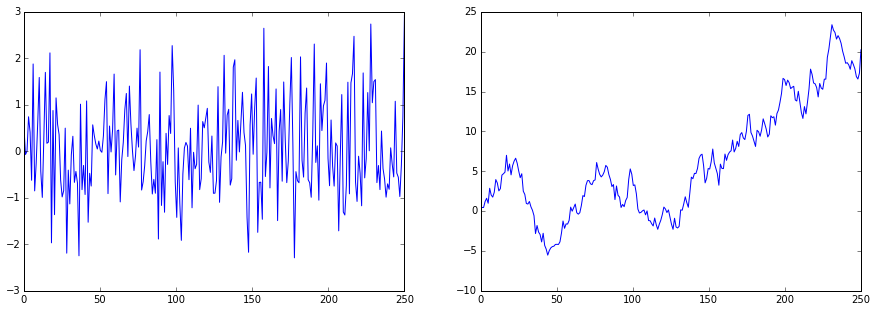

In [18]:
from numpy import random

# generate some Gaussian noise
n=250
I = np.linspace(0,n,n)
R = np.random.normal(size=n)

# integrate it to produce Brownian noise
B = np.cumsum(R)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.plot(I, R)
ax2.plot(I, B)

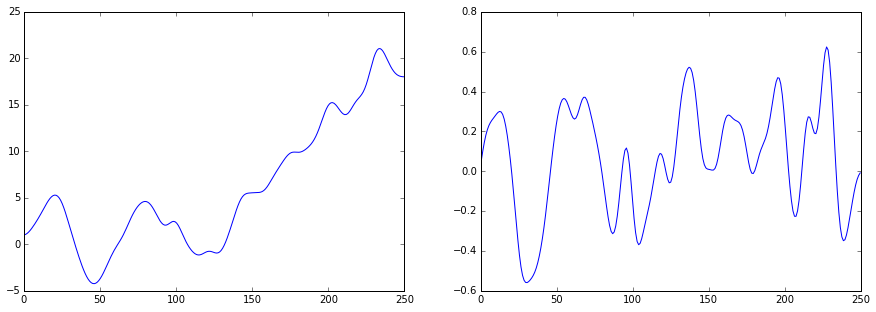

In [19]:
from scipy.ndimage.filters import gaussian_filter1d

# smooth the Brownian noise
smoothed = gaussian_filter1d(B, 4)

# now compute the first derivative of the smoothed function
D = np.diff(smoothed)

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.plot(I, smoothed)
ax2.plot(I[:-1]+0.5, D)

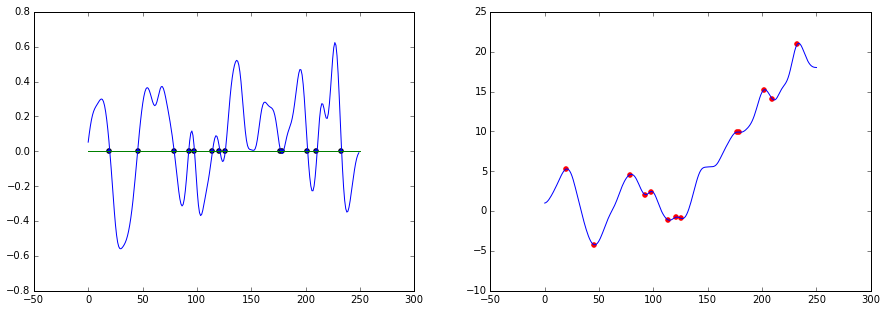

In [20]:
# find local peak/troughs
# first compute the sign of the first derivative
sign = np.sign(D)
# now take the derivative of that to find zero crossings
zero_x = np.where(np.diff(sign))
# to find y position of peak/troughs, just index into smoothed
zero_y = smoothed[zero_x]

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))

zero_x = zero_x[0]

ax1.plot(I[:-1], np.diff(smoothed))
ax1.plot([0,I.size],[0,0])
ax1.scatter(zero_x + 0.5, np.zeros(zero_x.size))

ax2.plot(I, smoothed)
ax2.scatter(zero_x + 0.5, zero_y, color='red')

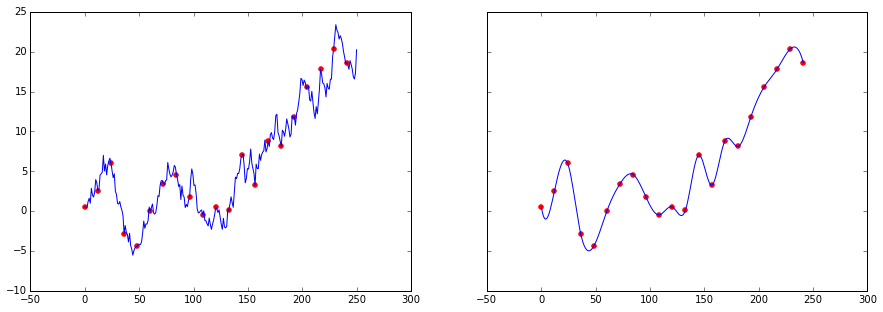

In [22]:
from scipy.interpolate import interp1d

# pick n points at evenly spaced intervals
n=20
pts = np.arange(0,I.size,I.size//n)
sample_X = I[pts] # sample x positions
sample_Y = B[pts] # sample values

# perform cubic interpolation
fn = interp1d(sample_X, sample_Y, kind='cubic', bounds_error=False)

fig, (ax1, ax2) = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(15,5))

ax1.plot(I, B)
ax1.scatter(sample_X, sample_Y, color='red')
ax2.plot(I, fn(I))
ax2.scatter(sample_X, sample_Y, color='red')